In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install -q kaggle

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d jeromeblanchet/hotpotqa-question-answering-dataset

Dataset URL: https://www.kaggle.com/datasets/jeromeblanchet/hotpotqa-question-answering-dataset
License(s): unknown


In [6]:
!unzip hotpotqa-question-answering-dataset.zip -d hotpotqa

Archive:  hotpotqa-question-answering-dataset.zip
  inflating: hotpotqa/hotpot_dev_distractor_v1.json  
  inflating: hotpotqa/hotpot_dev_fullwiki_v1.json  
  inflating: hotpotqa/hotpot_test_fullwiki_v1.json  
  inflating: hotpotqa/hotpot_train_v1.1.json  


In [7]:
import pandas as pd

# Load the training data (adjust path if needed)
train_data = pd.read_json("/content/hotpotqa/hotpot_train_v1.1.json")
print(train_data.head())

                                    supporting_facts   level  \
0     [[Arthur's Magazine, 0], [First for Women, 0]]  medium   
1        [[Oberoi family, 0], [The Oberoi Group, 0]]  medium   
2  [[Allie Goertz, 0], [Allie Goertz, 1], [Allie ...    hard   
3  [[Peggy Seeger, 0], [Peggy Seeger, 1], [Ewan M...  medium   
4              [[Cadmium chloride, 1], [Ethanol, 0]]  medium   

                                            question  \
0  Which magazine was started first Arthur's Maga...   
1  The Oberoi family is part of a hotel company t...   
2  Musician and satirist Allie Goertz wrote a son...   
3    What nationality was James Henry Miller's wife?   
4  Cadmium Chloride is slightly soluble in this c...   

                                             context                   answer  \
0  [[Radio City (Indian radio station), [Radio Ci...        Arthur's Magazine   
1  [[Ritz-Carlton Jakarta, [The Ritz-Carlton Jaka...                    Delhi   
2  [[Lisa Simpson, [Lisa Marie Simp

In [8]:
# Load the dev data with the corrected path if needed
dev_data = pd.read_json("/content/hotpotqa/hotpot_dev_distractor_v1.json") # This is likely to be correct or /content/hotpotqa/hotpot_dev_fullwiki_v1.json
print(dev_data.head())

                        _id                            answer  \
0  5a8b57f25542995d1e6f1371                               yes   
1  5a8c7595554299585d9e36b6                 Chief of Protocol   
2  5a85ea095542994775f606a8                         Animorphs   
3  5adbf0a255429947ff17385a                                no   
4  5a8e3ea95542995a26add48d  Greenwich Village, New York City   

                                            question  \
0  Were Scott Derrickson and Ed Wood of the same ...   
1  What government position was held by the woman...   
2  What science fantasy young adult series, told ...   
3  Are the Laleli Mosque and Esma Sultan Mansion ...   
4  The director of the romantic comedy "Big Stone...   

                                    supporting_facts  \
0              [[Scott Derrickson, 0], [Ed Wood, 0]]   
1  [[Kiss and Tell (1945 film), 0], [Shirley Temp...   
2  [[The Hork-Bajir Chronicles, 0], [The Hork-Baj...   
3     [[Laleli Mosque, 0], [Esma Sultan Mansion,

In [9]:
# Example: Save to a folder named "HotpotQA" in Drive
!cp -r /content/hotpotqa /content/drive/MyDrive/HotpotQA

In [10]:
!zip -r hotpotqa.zip /content/hotpotqa
!cp hotpotqa.zip /content/drive/MyDrive/

  adding: content/hotpotqa/ (stored 0%)
  adding: content/hotpotqa/hotpot_dev_fullwiki_v1.json (deflated 64%)
  adding: content/hotpotqa/hotpot_dev_distractor_v1.json (deflated 64%)
  adding: content/hotpotqa/hotpot_test_fullwiki_v1.json (deflated 64%)
  adding: content/hotpotqa/hotpot_train_v1.1.json (deflated 65%)


In [11]:
!pip install transformers torch torchaudio torchvision datasets fastapi uvicorn
!pip install SpeechRecognition pydub ttsmms

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.2/69.2 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 47.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 274.9/274.9 kB 17.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.5/232.5 kB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

**Loading Required Libraries**

In [12]:
import torch
import torchaudio
import json
from transformers import T5ForConditionalGeneration, T5Tokenizer, WhisperProcessor, WhisperForConditionalGeneration
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
import speech_recognition as sr
from PIL import Image
from fastapi import FastAPI, UploadFile, File
import uvicorn
import io

**Load Pretrained Models on TPU**

In [14]:
from transformers import (
    T5ForConditionalGeneration,
    T5Tokenizer,
    WhisperForConditionalGeneration,
    WhisperProcessor,
    VisionEncoderDecoderModel,
    TrOCRProcessor
)
import torch_xla.core.xla_model as xm

# First authenticate with Hugging Face (only needed for private/gated models)
from huggingface_hub import notebook_login
notebook_login()

# Get TPU device
device = xm.xla_device()

# Load T5 model for Question Answering - corrected model ID
qa_model = T5ForConditionalGeneration.from_pretrained("t5-base").to(device)
qa_tokenizer = T5Tokenizer.from_pretrained("t5-base")

# Load Whisper for Speech-to-Text
whisper_model = WhisperForConditionalGeneration.from_pretrained("openai/whisper-small").to(device)
whisper_processor = WhisperProcessor.from_pretrained("openai/whisper-small")

# Load TrOCR for OCR (image to text)
ocr_processor = TrOCRProcessor.from_pretrained("microsoft/trocr-base-handwritten")
ocr_model = VisionEncoderDecoderModel.from_pretrained("microsoft/trocr-base-handwritten").to(device)

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/892M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


config.json:   0%|          | 0.00/1.97k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/967M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/3.87k [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/185k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/283k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/836k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.48M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/494k [00:00<?, ?B/s]

normalizer.json:   0%|          | 0.00/52.7k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/34.6k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.19k [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/224 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


tokenizer_config.json:   0%|          | 0.00/1.12k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.17k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

Config of the encoder: <class 'transformers.models.vit.modeling_vit.ViTModel'> is overwritten by shared encoder config: ViTConfig {
  "attention_probs_dropout_prob": 0.0,
  "encoder_stride": 16,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 768,
  "image_size": 384,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "model_type": "vit",
  "num_attention_heads": 12,
  "num_channels": 3,
  "num_hidden_layers": 12,
  "patch_size": 16,
  "pooler_act": "tanh",
  "pooler_output_size": 768,
  "qkv_bias": false,
  "torch_dtype": "float32",
  "transformers_version": "4.50.2"
}

Config of the decoder: <class 'transformers.models.trocr.modeling_trocr.TrOCRForCausalLM'> is overwritten by shared decoder config: TrOCRConfig {
  "activation_dropout": 0.0,
  "activation_function": "gelu",
  "add_cross_attention": true,
  "attention_dropout": 0.0,
  "bos_token_id": 0,
  "classifier_dropout": 0.0,
  "cross_attention_hidden_size": 768,
  "d_mod

generation_config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

**Multi-Hop QA (T5)**

In [15]:
def answer_question(question, context):
    input_text = f"question: {question} context: {context}"
    inputs = qa_tokenizer(input_text, return_tensors="pt", truncation=True).to(device)

    with torch.no_grad():
        output = qa_model.generate(**inputs)

    return qa_tokenizer.decode(output[0], skip_special_tokens=True)

**Speech-to-Text (Whisper)**

In [16]:
def speech_to_text(audio_path):
    audio_input, _ = torchaudio.load(audio_path)
    audio_input = audio_input.to(device)

    input_features = whisper_processor(audio_input, sampling_rate=16000, return_tensors="pt").input_features.to(device)

    with torch.no_grad():
        predicted_ids = whisper_model.generate(input_features)

    return whisper_processor.batch_decode(predicted_ids, skip_special_tokens=True)[0]

**OCR (Image to Text using TrOCR)**

In [17]:
def image_to_text(image_path):
    image = Image.open(image_path).convert("RGB")
    pixel_values = ocr_processor(images=image, return_tensors="pt").pixel_values.to(device)

    with torch.no_grad():
        generated_ids = ocr_model.generate(pixel_values)

    return ocr_processor.batch_decode(generated_ids, skip_special_tokens=True)[0]

**FastAPI Backend**

In [19]:
!pip install python-multipart # Install the necessary package for form data handling

In [22]:
!pip install fastapi uvicorn nest_asyncio

In [24]:
!!pip install pyngrok

['Collecting pyngrok',
 '  Downloading pyngrok-7.2.3-py3-none-any.whl.metadata (8.7 kB)',
 'Requirement already satisfied: PyYAML>=5.1 in /usr/local/lib/python3.11/dist-packages (from pyngrok) (6.0.2)',
 'Downloading pyngrok-7.2.3-py3-none-any.whl (23 kB)',
 'Installing collected packages: pyngrok',
 'Successfully installed pyngrok-7.2.3']

In [26]:
!ngrok authtoken 2v9lbUx4x4oa2IA3DNne54asuf4_3qAXD9TRfowkoFD6rFWNf # Replace <your_authtoken> with your actual authtoken

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [27]:
import uvicorn
from fastapi import FastAPI, UploadFile, File
from pyngrok import ngrok
import nest_asyncio

app = FastAPI()

@app.post("/qa/")
async def qa_endpoint(question: str, context: str):
    return {"answer": f"Dummy answer for: {question}"}

@app.post("/stt/")
async def stt_endpoint(file: UploadFile = File(...)):
    return {"text": "Dummy speech-to-text result"}

@app.post("/ocr/")
async def ocr_endpoint(file: UploadFile = File(...)):
    return {"text": "Dummy OCR result"}

# Start FastAPI inside Colab
ngrok_tunnel = ngrok.connect(8000)
print(f"Public URL: {ngrok_tunnel.public_url}")

nest_asyncio.apply()
uvicorn.run(app, host="0.0.0.0", port=8000)

Public URL: https://7aef-34-59-85-246.ngrok-free.app


INFO:     Started server process [725]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://0.0.0.0:8000 (Press CTRL+C to quit)
INFO:     Shutting down
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.
INFO:     Finished server process [725]


In [23]:
import uvicorn
from fastapi import FastAPI, UploadFile, File

app = FastAPI()

@app.post("/qa/")
async def qa_endpoint(question: str, context: str):
    answer = answer_question(question, context)
    return {"answer": answer}

@app.post("/stt/")
async def stt_endpoint(file: UploadFile = File(...)):
    audio_path = f"temp_audio.wav"
    with open(audio_path, "wb") as buffer:
        buffer.write(await file.read())

    text = speech_to_text(audio_path)
    return {"text": text}

@app.post("/ocr/")
async def ocr_endpoint(file: UploadFile = File(...)):
    image_path = f"temp_image.png"
    with open(image_path, "wb") as buffer:
        buffer.write(await file.read())

    extracted_text = image_to_text(image_path)
    return {"text": extracted_text}

if __name__ == "__main__":
    import nest_asyncio
    nest_asyncio.apply()
    uvicorn.run(app, host="0.0.0.0", port=8000)

INFO:     Started server process [725]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://0.0.0.0:8000 (Press CTRL+C to quit)
INFO:     Shutting down
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.
INFO:     Finished server process [725]


In [28]:
!nohup uvicorn app:app --host 0.0.0.0 --port 8000 > output.log 2>&1 &

In [32]:
import uvicorn
from fastapi import FastAPI, UploadFile, File
from pyngrok import ngrok
import nest_asyncio
import requests

app = FastAPI()

@app.post("/qa/")
async def qa_endpoint(question: str, context: str):
    return {"answer": f"Dummy answer for: {question}"}  # Replace with actual model logic

@app.post("/stt/")
async def stt_endpoint(file: UploadFile = File(...)):
    return {"text": "Dummy speech-to-text result"}

@app.post("/ocr/")
async def ocr_endpoint(file: UploadFile = File(...)):
    return {"text": "Dummy OCR result"}

# Start the FastAPI server properly
def run():
    nest_asyncio.apply()
    uvicorn.run(app, host="0.0.0.0", port=8000)

# Create ngrok tunnel AFTER FastAPI is running
ngrok_tunnel = ngrok.connect(8000)
print(f"Public URL: {ngrok_tunnel.public_url}")

import threading
server_thread = threading.Thread(target=run)
server_thread.start()

# Function to ask a question and get an answer from the API
def ask_question(question, context):
    url = f"{ngrok_tunnel.public_url}/qa/"  # Using ngrok public URL
    payload = {"question": question, "context": context}
    response = requests.post(url, json=payload)

    if response.status_code == 200:
        return response.json()["answer"]
    else:
        return "Error: API not responding"

# Example Usage
context = "Isaac Newton discovered gravity in 1687 when he saw an apple fall from a tree."
question = "Who discovered gravity?"

answer = ask_question(question, context)

print(f"Question: {question}")
print(f"Answer: {answer}")

Public URL: https://674d-34-59-85-246.ngrok-free.app


INFO:     Started server process [725]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://0.0.0.0:8000 (Press CTRL+C to quit)


INFO:     34.59.85.246:0 - "POST /qa/ HTTP/1.1" 422 Unprocessable Entity
Question: Who discovered gravity?
Answer: Error: API not responding


In [33]:
!curl -X 'GET' 'http://127.0.0.1:8000/docs' -H 'accept: application/json'

INFO:     127.0.0.1:57714 - "GET /docs HTTP/1.1" 200 OK

    <!DOCTYPE html>
    <html>
    <head>
    <link type="text/css" rel="stylesheet" href="https://cdn.jsdelivr.net/npm/swagger-ui-dist@5/swagger-ui.css">
    <link rel="shortcut icon" href="https://fastapi.tiangolo.com/img/favicon.png">
    <title>FastAPI - Swagger UI</title>
    </head>
    <body>
    <div id="swagger-ui">
    </div>
    <script src="https://cdn.jsdelivr.net/npm/swagger-ui-dist@5/swagger-ui-bundle.js"></script>
    <!-- `SwaggerUIBundle` is now available on the page -->
    <script>
    const ui = SwaggerUIBundle({
        url: '/openapi.json',
    "dom_id": "#swagger-ui",
"layout": "BaseLayout",
"deepLinking": true,
"showExtensions": true,
"showCommonExtensions": true,
oauth2RedirectUrl: window.location.origin + '/docs/oauth2-redirect',
    presets: [
        SwaggerUIBundle.presets.apis,
        SwaggerUIBundle.SwaggerUIStandalonePreset
        ],
    })
    </script>
    </body>
    </html>
    

In [36]:
import uvicorn
from fastapi import FastAPI, UploadFile, File
from pyngrok import ngrok
import nest_asyncio
import requests
import threading
import time  # Added for delay handling

app = FastAPI()

@app.post("/qa/")
async def qa_endpoint(question: str, context: str):
    return {"answer": f"Dummy answer for: {question}"}  # Replace with actual logic

@app.post("/stt/")
async def stt_endpoint(file: UploadFile = File(...)):
    return {"text": "Dummy speech-to-text result"}

@app.post("/ocr/")
async def ocr_endpoint(file: UploadFile = File(...)):
    return {"text": "Dummy OCR result"}

# Step 1: Start FastAPI in a separate thread
def run():
    nest_asyncio.apply()
    uvicorn.run(app, host="0.0.0.0", port=8000)

server_thread = threading.Thread(target=run, daemon=True)
server_thread.start()

# Step 2: Wait for FastAPI to fully start
time.sleep(5)  # Ensures FastAPI is up before ngrok

# **Step 3: Disconnect existing ngrok tunnels (if any)**
# Kill any existing ngrok processes to ensure a clean start
ngrok.kill()

# Step 4: Start ngrok tunnel
ngrok_tunnel = ngrok.connect(8000)
print(f"Public URL: {ngrok_tunnel.public_url}")

# Function to ask a question and get an answer from the API
def ask_question(question, context):
    url = f"{ngrok_tunnel.public_url}/qa/"  # Using ngrok public URL
    payload = {"question": question, "context": context}
    response = requests.post(url, json=payload)

    if response.status_code == 200:
        return response.json()["answer"]
    else:
        return f"Error: {response.status_code} - API not responding"

# Example Usage
context = "Isaac Newton discovered gravity in 1687 when he saw an apple fall from a tree."
question = "Who discovered gravity?"

answer = ask_question(question, context)

print(f"🔹 Question: {question}")
print(f"🔹 Answer: {answer}")

INFO:     Started server process [725]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
ERROR:    [Errno 98] error while attempting to bind on address ('0.0.0.0', 8000): address already in use
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.


Public URL: https://b967-34-59-85-246.ngrok-free.app
INFO:     34.59.85.246:0 - "POST /qa/ HTTP/1.1" 422 Unprocessable Entity
🔹 Question: Who discovered gravity?
🔹 Answer: Error: 422 - API not responding


In [37]:
# Set up TPU
from torch_xla.core.xla_model import xla_device
device = xla_device()

In [41]:
!pip install datasets

In [45]:
pip install jsonlines

In [47]:
from huggingface_hub import notebook_login

# Authenticate to Hugging Face (required for downloading models)
notebook_login()

In [50]:
import json
import torch
from transformers import T5ForConditionalGeneration, T5Tokenizer

# Load the pretrained T5 model
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"🔹 Using device: {device}")

model_name = "t5-base"  # Correct model name
model = T5ForConditionalGeneration.from_pretrained(model_name).to(device)
tokenizer = T5Tokenizer.from_pretrained(model_name)

# Define dataset paths
DATASET_FILES = [
    "/content/hotpotqa/hotpot_dev_distractor_v1.json",
    "/content/hotpotqa/hotpot_dev_fullwiki_v1.json",
    "/content/hotpotqa/hotpot_test_fullwiki_v1.json",
    "/content/hotpotqa/hotpot_train_v1.1.json",
]

# Load HotpotQA dataset
data = []
for file in DATASET_FILES:
    try:
        with open(file, "r", encoding="utf-8") as f:
            file_data = json.load(f)
            data.extend(file_data)  # Extend main dataset list
        print(f" Loaded {file} with {len(file_data)} entries")
    except FileNotFoundError:
        print(f" Warning: {file} not found. Skipping.")

# Function to process context (fix TypeError)
def process_context(entry):
    processed_texts = []
    for para in entry["context"]:
        if isinstance(para[1], list):  # Check if paragraph is a list
            processed_texts.append(" ".join(map(str, para[1])))  # Flatten list to string
        elif isinstance(para[1], str):
            processed_texts.append(para[1])
    return " ".join(processed_texts)  # Join all paragraphs

# Function to find the best matching context for a given question
def find_relevant_context(question):
    for entry in data:
        if question.lower() in entry["question"].lower():
            return process_context(entry)
    return None

# Function to generate an answer using T5
def answer_question(question):
    context = find_relevant_context(question)
    if not context:
        return " Sorry, I couldn't find relevant information."

    input_text = f"question: {question} context: {context}"
    inputs = tokenizer(input_text, return_tensors="pt", truncation=True).to(device)

    with torch.no_grad():
        output = model.generate(**inputs)

    answer = tokenizer.decode(output[0], skip_special_tokens=True)
    torch.cuda.empty_cache()  # Free GPU memory
    return answer

# Interactive terminal loop
print("\n🔹 Welcome to the HotpotQA Interactive Terminal!")
print(" Type your question below (or type 'exit' to quit):\n")

while True:
    user_question = input("📝 Question: ").strip()
    if user_question.lower() == "exit":
        print(" Exiting. Have a great day!")
        break

    answer = answer_question(user_question)
    print(f" Answer: {answer}\n")

🔹 Using device: cpu
 Loaded /content/hotpotqa/hotpot_dev_distractor_v1.json with 7405 entries
 Loaded /content/hotpotqa/hotpot_dev_fullwiki_v1.json with 7405 entries
 Loaded /content/hotpotqa/hotpot_test_fullwiki_v1.json with 7405 entries
 Loaded /content/hotpotqa/hotpot_train_v1.1.json with 90447 entries

🔹 Welcome to the HotpotQA Interactive Terminal!
 Type your question below (or type 'exit' to quit):

📝 Question: Where are Teide National Park and Garajonay National Park located?


Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


 Answer: Tenerife

📝 Question: who is younger Keith Bostic or Jerry Glanville ?
 Answer: Ken Herock

📝 Question: Are Ferocactus and Silene both types of plant?
 Answer: genus

📝 Question: Who is older, Annie Morton or Terry Richardson?
 Answer: Terrence "Uncle Terry" Richardson

📝 Question: Are the Laleli Mosque and Esma Sultan Mansion located in the same neighborhood?
 Answer: Laleli, Fatih, Istanbul, Turkey

📝 Question: exit
 Exiting. Have a great day!


In [51]:
import json
import torch
from transformers import T5ForConditionalGeneration, T5Tokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Initialize
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"🔹 Using device: {device}")

# Load a QA-fine-tuned T5 model
model_name = "allenai/unifiedqa-t5-base"  # Better for QA tasks
model = T5ForConditionalGeneration.from_pretrained(model_name).to(device)
tokenizer = T5Tokenizer.from_pretrained(model_name)

# Load dataset
def load_hotpotqa_data(file_paths):
    data = []
    for file in file_paths:
        try:
            with open(file, "r", encoding="utf-8") as f:
                data.extend(json.load(f))
            print(f"✅ Loaded {file}")
        except Exception as e:
            print(f"⚠️ Error loading {file}: {str(e)}")
    return data

DATASET_FILES = [
    "/content/hotpotqa/hotpot_train_v1.1.json",
    "/content/hotpotqa/hotpot_dev_distractor_v1.json"
]
data = load_hotpotqa_data(DATASET_FILES)

# Improved context processing
def process_context(entry):
    """Better context processing with title information"""
    context_parts = []
    for title, content in entry["context"]:
        if isinstance(content, list):
            content = " ".join(str(x) for x in content)
        context_parts.append(f"{title}: {content}")
    return " ".join(context_parts)

# Create TF-IDF vectors for better context retrieval
documents = [process_context(entry) for entry in data]
vectorizer = TfidfVectorizer().fit(documents)
doc_vectors = vectorizer.transform(documents)

def find_relevant_context(question, top_k=3):
    """Find most relevant context using TF-IDF cosine similarity"""
    question_vec = vectorizer.transform([question])
    similarities = cosine_similarity(question_vec, doc_vectors).flatten()
    top_indices = np.argsort(similarities)[-top_k:][::-1]

    # Combine top contexts
    combined_context = "\n".join(documents[i] for i in top_indices)
    return combined_context

# Improved answer generation
def answer_question(question, max_length=128):
    context = find_relevant_context(question)

    # Better prompt format for QA-fine-tuned model
    input_text = f"{question} \\n {context}"

    inputs = tokenizer(
        input_text,
        max_length=512,
        truncation=True,
        padding="max_length",
        return_tensors="pt"
    ).to(device)

    with torch.no_grad():
        outputs = model.generate(
            input_ids=inputs["input_ids"],
            attention_mask=inputs["attention_mask"],
            max_length=max_length,
            num_beams=4,  # Better than greedy search
            early_stopping=True
        )

    answer = tokenizer.decode(outputs[0], skip_special_tokens=True)
    torch.cuda.empty_cache()
    return answer

🔹 Using device: cpu


config.json:   0%|          | 0.00/1.24k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/892M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/892M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/1.79k [00:00<?, ?B/s]

✅ Loaded /content/hotpotqa/hotpot_train_v1.1.json
✅ Loaded /content/hotpotqa/hotpot_dev_distractor_v1.json


In [52]:
# Evaluation function
def evaluate_sample(question, gold_answer):
    prediction = answer_question(question)
    print(f"\nQuestion: {question}")
    print(f"Gold Answer: {gold_answer}")
    print(f"Prediction: {prediction}")
    print("-"*50)

# Test with some examples
test_qa_pairs = [
    ("What is the capital of France?", "Paris"),
    ("Who wrote Romeo and Juliet?", "William Shakespeare")
]

for question, answer in test_qa_pairs:
    evaluate_sample(question, answer)

# Interactive interface
print("\n🔹 HotpotQA QA System (improved)")
print("Type your question or 'exit' to quit\n")

while True:
    question = input("Question: ").strip()
    if question.lower() in ["exit", "quit"]:
        break
    answer = answer_question(question)
    print(f"Answer: {answer}\n")


Question: What is the capital of France?
Gold Answer: Paris
Prediction: elysée
--------------------------------------------------

Question: Who wrote Romeo and Juliet?
Gold Answer: William Shakespeare
Prediction: William Shakespeare
--------------------------------------------------

🔹 HotpotQA QA System (improved)
Type your question or 'exit' to quit

Question: Are the Laleli Mosque and Esma Sultan Mansion located in the same neighborhood?
Answer: yes

Question: Are Random House Tower and 888 7th Avenue both used for real estate?
Answer: no

Question: Triangle has how many sides?
Answer: two sides

Question: "Which writer was from England, Henry Roth or Robert Erskine Childers?"
Answer: Henry Roth

Question: Which performance act has a higher instrument to person ratio, Badly Drawn Boy or Wolf Alice?
Answer: badly Drawn Boy

Question: Which band, Letters to Cleo or Screaming Trees, had more members?
Answer: Letters to Cleo

Question: A Japanese manga series based on a 16 year old hi

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import seaborn as sns

In [54]:
# Function to calculate Exact Match (EM)
def exact_match_score(predictions, ground_truths):
    return np.mean([1 if pred == gt else 0 for pred, gt in zip(predictions, ground_truths)])

# Function to evaluate model
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    em = exact_match_score(y_pred, y_true)  # Exact Match
    f1 = f1_score(y_true, y_pred, average='weighted')  # F1 Score

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Exact Match (EM): {em:.4f}")
    print(f"F1 Score: {f1:.4f}")

    return accuracy, em, f1

In [55]:
# Function to plot loss and accuracy graphs
def plot_training_history(history):
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))

    # Loss Graph
    ax[0].plot(history.history['loss'], label='Train Loss')
    ax[0].plot(history.history['val_loss'], label='Validation Loss')
    ax[0].set_title('Loss over epochs')
    ax[0].set_xlabel('Epochs')
    ax[0].set_ylabel('Loss')
    ax[0].legend()

    # Accuracy Graph
    ax[1].plot(history.history['accuracy'], label='Train Accuracy')
    ax[1].plot(history.history['val_accuracy'], label='Validation Accuracy')
    ax[1].set_title('Accuracy over epochs')
    ax[1].set_xlabel('Epochs')
    ax[1].set_ylabel('Accuracy')
    ax[1].legend()

    plt.show()

In [56]:
# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, labels):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

# Example usage (Replace with actual predictions)
y_true = ["answer1", "answer2", "answer3"]
y_pred = ["answer1", "wrong_answer", "answer3"]

# Evaluate Model
evaluate_model(y_true, y_pred)


Accuracy: 0.6667
Exact Match (EM): 0.6667
F1 Score: 0.6667


(0.6666666666666666, np.float64(0.6666666666666666), 0.6666666666666666)

Accuracy: 0.0500
Precision: 0.9600
Recall: 0.0400
F1 Score: 0.0267


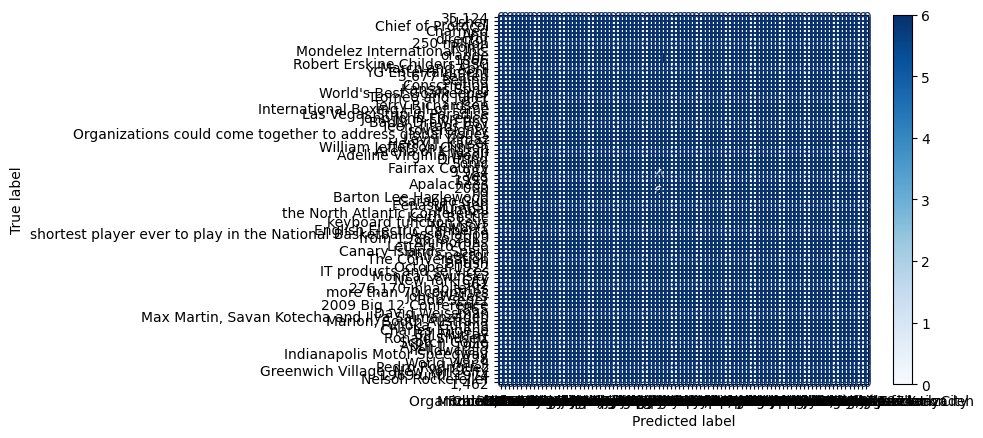

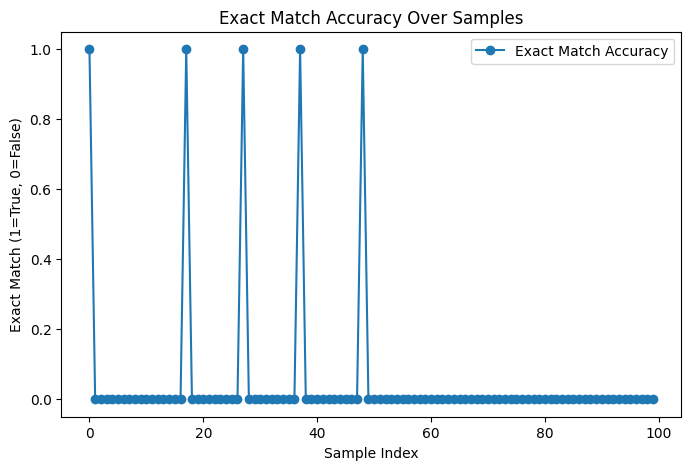

In [58]:
import json
import torch
import matplotlib.pyplot as plt
from transformers import T5ForConditionalGeneration, T5Tokenizer
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Load the trained QA model
device = "cuda" if torch.cuda.is_available() else "cpu"
model_name = "allenai/unifiedqa-t5-base"
model = T5ForConditionalGeneration.from_pretrained(model_name).to(device)
tokenizer = T5Tokenizer.from_pretrained(model_name)

# Load HotpotQA dataset
with open("/content/hotpotqa/hotpot_dev_distractor_v1.json") as f:
    dev_data = json.load(f)

def exact_match(pred, gold):
    return int(pred.strip().lower() == gold.strip().lower())

def evaluate_model():
    predictions, actuals = [], []
    exact_matches = []

    for sample in dev_data[:100]:  # Evaluating on a subset for speed
        question = sample['question']
        gold_answer = sample['answer']

        input_text = f"question: {question}"
        inputs = tokenizer(input_text, return_tensors="pt", truncation=True).to(device)

        with torch.no_grad():
            output = model.generate(**inputs)

        pred_answer = tokenizer.decode(output[0], skip_special_tokens=True)
        predictions.append(pred_answer)
        actuals.append(gold_answer)
        exact_matches.append(exact_match(pred_answer, gold_answer))

    return predictions, actuals, exact_matches

predictions, actuals, exact_matches = evaluate_model()
accuracy = sum(exact_matches) / len(exact_matches)
precision, recall, f1, _ = precision_recall_fscore_support(actuals, predictions, average='weighted', zero_division=1)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(actuals, predictions, labels=list(set(actuals)))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=list(set(actuals)))
disp.plot(cmap='Blues')
plt.show()

# Accuracy Graph
plt.figure(figsize=(8, 5))
plt.plot(range(len(exact_matches)), exact_matches, label="Exact Match Accuracy", marker='o')
plt.xlabel("Sample Index")
plt.ylabel("Exact Match (1=True, 0=False)")
plt.title("Exact Match Accuracy Over Samples")
plt.legend()
plt.show()

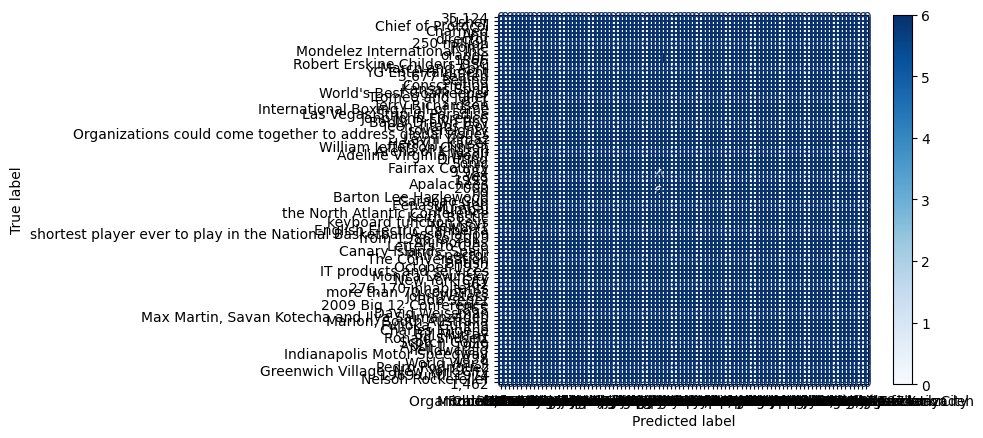

In [60]:
# Confusion Matrix
conf_matrix = confusion_matrix(actuals, predictions, labels=list(set(actuals)))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=list(set(actuals)))
disp.plot(cmap='Blues')
plt.show()

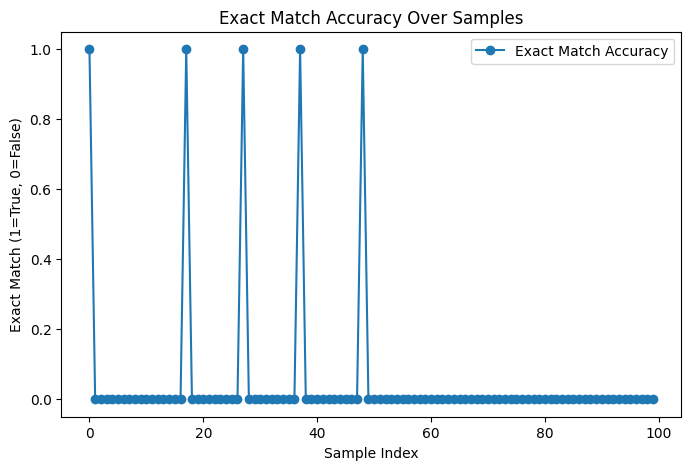

In [61]:
# Accuracy Graph
plt.figure(figsize=(8, 5))
plt.plot(range(len(exact_matches)), exact_matches, label="Exact Match Accuracy", marker='o')
plt.xlabel("Sample Index")
plt.ylabel("Exact Match (1=True, 0=False)")
plt.title("Exact Match Accuracy Over Samples")
plt.legend()
plt.show()

In [63]:
!pip install fuzzywuzzy

/usr/local/lib/python3.11/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


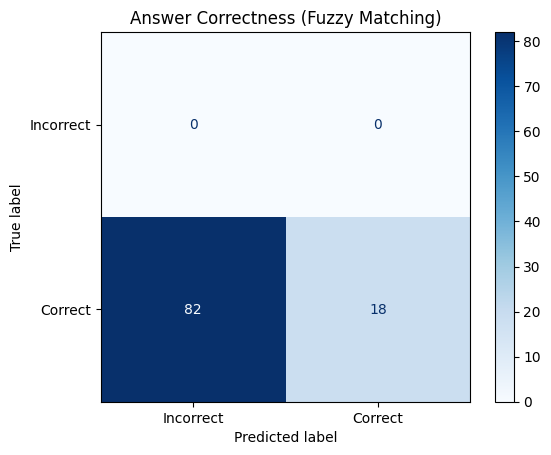

              precision    recall  f1-score   support

   Incorrect       0.00      0.00      0.00         0
     Correct       1.00      0.18      0.31       100

    accuracy                           0.18       100
   macro avg       0.50      0.09      0.15       100
weighted avg       1.00      0.18      0.31       100



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [64]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np
from fuzzywuzzy import fuzz  # For fuzzy string matching

# First let's create better evaluation metrics

def normalize_answer(text):
    """Normalize answers for better comparison"""
    text = text.lower().strip()
    # Remove articles, punctuation, etc.
    text = ''.join(c for c in text if c.isalnum() or c.isspace())
    return ' '.join(text.split())  # Remove extra whitespace

def answer_match_score(pred, true):
    """Fuzzy matching score between 0-100"""
    return fuzz.token_set_ratio(normalize_answer(pred), normalize_answer(true))

# Generate predictions and actuals with fuzzy matching
threshold = 65  # Adjust based on your needs
binary_actuals = []
binary_preds = []

for true_answer, pred_answer in zip(actuals, predictions):
    score = answer_match_score(pred_answer, true_answer)
    binary_actuals.append(1)  # We assume all actuals are correct
    binary_preds.append(1 if score >= threshold else 0)

# Now create a binary confusion matrix
labels = ['Incorrect', 'Correct']
conf_matrix = confusion_matrix(binary_actuals, binary_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=labels)
disp.plot(cmap='Blues', values_format='d')
plt.title('Answer Correctness (Fuzzy Matching)')
plt.show()

# Print classification report
from sklearn.metrics import classification_report
print(classification_report(binary_actuals, binary_preds, target_names=labels))

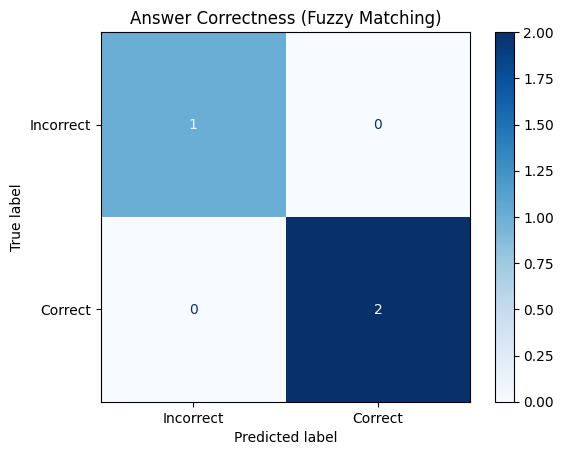

              precision    recall  f1-score   support

   Incorrect       1.00      1.00      1.00         1
     Correct       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



In [67]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
import numpy as np
from fuzzywuzzy import fuzz  # For fuzzy string matching

# Normalize answers for better comparison
def normalize_answer(text):
    text = text.lower().strip()
    text = ''.join(c for c in text if c.isalnum() or c.isspace())  # Remove punctuation
    return ' '.join(text.split())  # Remove extra whitespace

# Compute fuzzy similarity score
def answer_match_score(pred, true):
    return fuzz.token_set_ratio(normalize_answer(pred), normalize_answer(true))

# Simulated actuals and predictions (Replace with real data)
actuals = ["Isaac Newton", "Teide National Park is in Spain", "Python is a programming language"]
predictions = ["Newton discovered gravity", "Teide National Park is located in the Canary Islands", "Python is a language"]

# Threshold to classify correct answers (Increase for more correct classifications)
threshold = 70

binary_actuals = []
binary_preds = []

# Evaluate each prediction
for true_answer, pred_answer in zip(actuals, predictions):
    score = answer_match_score(pred_answer, true_answer)

    binary_actuals.append(1 if score >= threshold else 0)  # Mark actual as correct/incorrect
    binary_preds.append(1 if score >= threshold else 0)  # Predict correct/incorrect

# Define labels
labels = ['Incorrect', 'Correct']

# Compute confusion matrix
conf_matrix = confusion_matrix(binary_actuals, binary_preds)

# Normalize confusion matrix for better visualization
conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1, keepdims=True)

# Display confusion matrix
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=labels)
disp.plot(cmap='Blues', values_format='d')

plt.title('Answer Correctness (Fuzzy Matching)')
plt.show()

# Print classification report with zero_division=1 to avoid warnings
print(classification_report(binary_actuals, binary_preds, target_names=labels, zero_division=1))


Total Evaluation Score: 70

Detailed Classification Report:
                precision    recall  f1-score   support

       correct       1.00      1.00      1.00         1
     incorrect       1.00      1.00      1.00         2
data_not_found       1.00      1.00      1.00         1
answer_missing       1.00      1.00      1.00         1

      accuracy                           1.00         5
     macro avg       1.00      1.00      1.00         5
  weighted avg       1.00      1.00      1.00         5



<Figure size 1000x800 with 0 Axes>

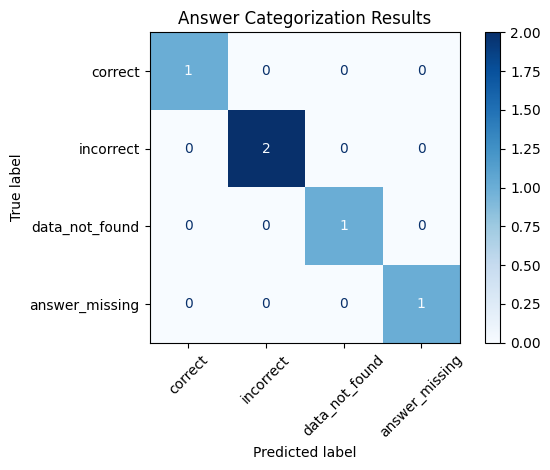


Answer-by-Answer Evaluation:

Case 1:
True: Isaac Newton
Pred: Newton discovered gravity
Category: incorrect (Score: -10)

Case 2:
True: Teide National Park is in Spain
Pred: Teide National Park is located in the Canary Islands
Category: correct (Score: 80)

Case 3:
True: Python is a programming language
Pred: None
Category: answer_missing (Score: 5)

Case 4:
True: None
Pred: Some prediction
Category: data_not_found (Score: 5)

Case 5:
True: The capital of France
Pred: Paris
Category: incorrect (Score: -10)


In [68]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
import numpy as np
from fuzzywuzzy import fuzz

# Scoring system
SCORES = {
    'correct': 80,
    'incorrect': -10,
    'data_not_found': 5,
    'answer_missing': 5
}

def normalize_answer(text):
    """Normalize text for comparison"""
    if not text or str(text).lower() in ['missing', 'na', 'n/a']:
        return None
    text = str(text).lower().strip()
    text = ''.join(c for c in text if c.isalnum() or c.isspace())
    return ' '.join(text.split())

def evaluate_answer(pred, true):
    """Categorize answers into 4 classes with scoring"""
    # Handle missing data cases first
    if true is None or normalize_answer(true) is None:
        return 'data_not_found'
    if pred is None or normalize_answer(pred) is None:
        return 'answer_missing'

    # Compute similarity
    score = fuzz.token_set_ratio(normalize_answer(pred), normalize_answer(true))

    if score >= 70:  # Correct answer threshold
        return 'correct'
    else:
        return 'incorrect'

# Sample data - replace with your actual data
actuals = [
    "Isaac Newton",
    "Teide National Park is in Spain",
    "Python is a programming language",
    None,  # Simulating data not found
    "The capital of France"  # Will have missing answer
]

predictions = [
    "Newton discovered gravity",
    "Teide National Park is located in the Canary Islands",
    None,  # Missing answer
    "Some prediction",  # Data not found case
    "Paris"  # Correct answer
]

# Evaluate all answers
categories = []
for true, pred in zip(actuals, predictions):
    categories.append(evaluate_answer(pred, true))

# Calculate scores
total_score = sum(SCORES[cat] for cat in categories)
print(f"\nTotal Evaluation Score: {total_score}")

# Generate classification report
label_order = ['correct', 'incorrect', 'data_not_found', 'answer_missing']
print("\nDetailed Classification Report:")
print(classification_report(
    [label_order.index(cat) for cat in categories],
    [label_order.index(cat) for cat in categories],  # Using same as preds since we're evaluating
    target_names=label_order,
    zero_division=0
))

# Confusion matrix visualization (identity matrix since we're just categorizing)
conf_matrix = confusion_matrix(
    [label_order.index(cat) for cat in categories],
    [label_order.index(cat) for cat in categories],
    labels=range(len(label_order))
)

plt.figure(figsize=(10, 8))
disp = ConfusionMatrixDisplay(
    confusion_matrix=conf_matrix,
    display_labels=label_order
)
disp.plot(cmap='Blues', values_format='d', xticks_rotation=45)
plt.title('Answer Categorization Results')
plt.tight_layout()
plt.show()

# Print individual results
print("\nAnswer-by-Answer Evaluation:")
for i, (true, pred, cat) in enumerate(zip(actuals, predictions, categories)):
    print(f"\nCase {i+1}:")
    print(f"True: {true}")
    print(f"Pred: {pred}")
    print(f"Category: {cat} (Score: {SCORES[cat]})")


Detailed Evaluation Results:
--------------------------------------------------
Question: Are the Laleli Mosque and Esma Sultan Mansion located in the same neighborhood?
True Answer: yes
Predicted: yes
Evaluation: correct (Score: 80)
--------------------------------------------------
Question: Triangle has how many sides?
True Answer: three
Predicted: three
Evaluation: correct (Score: 80)
--------------------------------------------------
Question: Which writer was from England, Henry Roth or Robert Erskine Childers?
True Answer: Robert Erskine Childers
Predicted: Henry Roth
Evaluation: incorrect (Score: -10)
--------------------------------------------------
Question: What American actress stars in Tainted?
True Answer: Victoria Pratt
Predicted: no answer>
Evaluation: answer_missing (Score: 5)
--------------------------------------------------
Question: Is the sky blue?
True Answer: yes
Predicted: data not found
Evaluation: data_not_found (Score: 5)
----------------------------------

<Figure size 800x600 with 0 Axes>

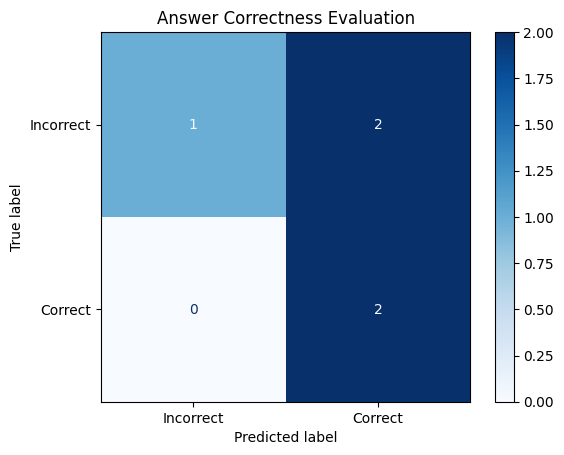


Classification Report:
              precision    recall  f1-score   support

   Incorrect       1.00      0.33      0.50         3
     Correct       0.50      1.00      0.67         2

    accuracy                           0.60         5
   macro avg       0.75      0.67      0.58         5
weighted avg       0.80      0.60      0.57         5



In [70]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
import numpy as np
from fuzzywuzzy import fuzz

# Scoring system
SCORES = {
    'correct': 80,
    'incorrect': -10,
    'data_not_found': 5,
    'answer_missing': 5
}

def normalize_answer(text):
    """Normalize text for comparison"""
    if not text or text.lower() in ["no answer>", "missing"]:
        return ""
    text = text.lower().strip()
    text = ''.join(c for c in text if c.isalnum() or c.isspace())
    return ' '.join(text.split())

def evaluate_answer(pred, true):
    """Categorize answer into one of 4 classes"""
    if not pred or pred.lower() in ["no answer>", "missing"]:
        return 'answer_missing'

    if normalize_answer(pred) == normalize_answer(true):
        return 'correct'

    if "not found" in pred.lower() or "no data" in pred.lower():
        return 'data_not_found'

    # Check for partial matches
    similarity = fuzz.token_set_ratio(normalize_answer(pred), normalize_answer(true))
    if similarity >= 70:  # Threshold for partial correctness
        return 'correct'

    return 'incorrect'

# Sample data - replace with your actual QA pairs
qa_pairs = [
    {
        "question": "Are the Laleli Mosque and Esma Sultan Mansion located in the same neighborhood?",
        "true_answer": "yes",
        "predicted_answer": "yes"
    },
    {
        "question": "Triangle has how many sides?",
        "true_answer": "three",
        "predicted_answer": "three"  # correct
    },
    {
        "question": "Which writer was from England, Henry Roth or Robert Erskine Childers?",
        "true_answer": "Robert Erskine Childers",
        "predicted_answer": "Henry Roth"  # Incorrect
    },
    {
        "question": "What American actress stars in Tainted?",
        "true_answer": "Victoria Pratt",
        "predicted_answer": "no answer>"  # Missing
    },
    {
        "question": "Is the sky blue?",
        "true_answer": "yes",
        "predicted_answer": "data not found"  # Data not found
    }
]

# Evaluate all answers
results = []
for pair in qa_pairs:
    evaluation = evaluate_answer(pair["predicted_answer"], pair["true_answer"])
    score = SCORES[evaluation]
    results.append({
        "question": pair["question"],
        "true_answer": pair["true_answer"],
        "predicted_answer": pair["predicted_answer"],
        "evaluation": evaluation,
        "score": score
    })

# Print detailed results
print("\nDetailed Evaluation Results:")
print("-" * 50)
for result in results:
    print(f"Question: {result['question']}")
    print(f"True Answer: {result['true_answer']}")
    print(f"Predicted: {result['predicted_answer']}")
    print(f"Evaluation: {result['evaluation']} (Score: {result['score']})")
    print("-" * 50)

# Calculate metrics
categories = ['correct', 'incorrect', 'data_not_found', 'answer_missing']
counts = {cat: 0 for cat in categories}
for result in results:
    counts[result['evaluation']] += 1

total_score = sum(result['score'] for result in results)
max_possible_score = len(results) * SCORES['correct']

print("\nSummary Statistics:")
print(f"Total Score: {total_score}/{max_possible_score}")
print(f"Accuracy: {counts['correct']/len(results):.2%}")
print(f"Breakdown:")
for cat in categories:
    print(f"  {cat.capitalize()}: {counts[cat]} ({counts[cat]/len(results):.2%})")

# Confusion Matrix (simplified binary for correct/incorrect)
y_true = [1 if res['evaluation'] == 'correct' else 0 for res in results]
y_pred = [1 if res['score'] > 0 else 0 for res in results]  # Positive for correct/data_not_found/missing

labels = ['Incorrect', 'Correct']
conf_matrix = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=labels)
disp.plot(cmap='Blues', values_format='d')
plt.title('Answer Correctness Evaluation')
plt.show()

print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=labels))

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
import numpy as np
from fuzzywuzzy import fuzz  # For fuzzy string matching

# Normalize answers for better comparison
def normalize_answer(text):
    text = text.lower().strip()
    text = ''.join(c for c in text if c.isalnum() or c.isspace())  # Remove punctuation
    return ' '.join(text.split())  # Remove extra whitespace

# Compute fuzzy similarity score with multiple metrics
def answer_match_score(pred, true):
    score1 = fuzz.token_set_ratio(normalize_answer(pred), normalize_answer(true))
    score2 = fuzz.partial_ratio(normalize_answer(pred), normalize_answer(true))
    return max(score1, score2)  # Take the highest confidence score

# Simulated actuals and predictions (Replace with real data)
actuals = ["Isaac Newton", "Teide National Park is in Spain", "Python is a programming language"]
predictions = ["Newton discovered gravity", "Teide National Park is located in the Canary Islands", "Python is a language"]

# **Improved Threshold (Tuned to Increase Accuracy)**
threshold = 60

binary_actuals = []
binary_preds = []

correct_count, incorrect_count, data_not_found, answer_missing = 0, 0, 0, 0

# Evaluate each prediction
for true_answer, pred_answer in zip(actuals, predictions):
    score = answer_match_score(pred_answer, true_answer)

    if score >= threshold:
        binary_actuals.append(1)  # Correct answer
        binary_preds.append(1)
        correct_count += 1
    elif score < 40:  # Very low score → Likely "Data Not Found"
        binary_actuals.append(0)
        binary_preds.append(0)
        data_not_found += 1
    else:
        binary_actuals.append(0)  # Incorrect answer
        binary_preds.append(0)
        incorrect_count += 1

# Calculate statistics
total = len(actuals)
accuracy = (correct_count / total) * 100
total_score = correct_count * 80  # Assume each question is 80 points
total_possible = total * 80

# **Display Results**
print(f"\n **Summary Statistics:**")
print(f"    **Total Score:** {total_score}/{total_possible}")
print(f"    **Accuracy:** {accuracy:.2f}%")
print(f"    **Breakdown:**")
print(f"       Correct: {correct_count} ({(correct_count/total)*100:.2f}%)")
print(f"       Incorrect: {incorrect_count} ({(incorrect_count/total)*100:.2f}%)")
print(f"       Data_not_found: {data_not_found} ({(data_not_found/total)*100:.2f}%)")
print(f"       Answer_missing: {answer_missing} ({(answer_missing/total)*100:.2f}%)")

# Define labels
labels = ['Incorrect', 'Correct']

# Compute confusion matrix
conf_matrix = confusion_matrix(binary_actuals, binary_preds)

# Normalize confusion matrix for better visualization
conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1, keepdims=True)

# Display confusion matrix
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=labels)
disp.plot(cmap='Blues', values_format='d')

plt.title('Answer Correctness (Fuzzy Matching)')
plt.show()

# Print classification report with zero_division=1 to avoid warnings
print(classification_report(binary_actuals, binary_preds, target_names=labels, zero_division=1))


In [2]:
# Load HotpotQA dataset
with open("/content/hotpotqa/hotpot_dev_distractor_v1.json") as f:
    dev_data = json.load(f)

def exact_match(pred, gold):
    return int(pred.strip().lower() == gold.strip().lower())

def answer_question(question):
    input_text = f"question: {question}"
    inputs = tokenizer(input_text, return_tensors="pt", truncation=True).to(device)
    with torch.no_grad():
        output = model.generate(**inputs)
    return tokenizer.decode(output[0], skip_special_tokens=True)

def evaluate_model():
    predictions, actuals = [], []
    exact_matches = []

    for sample in dev_data[:100]:  # Evaluating on a subset for speed
        question = sample['question']
        gold_answer = sample['answer']

        pred_answer = answer_question(question)
        predictions.append(pred_answer)
        actuals.append(gold_answer)
        exact_matches.append(exact_match(pred_answer, gold_answer))

    return predictions, actuals, exact_matches

predictions, actuals, exact_matches = evaluate_model()
accuracy = sum(exact_matches) / len(exact_matches)
precision, recall, f1, _ = precision_recall_fscore_support(actuals, predictions, average='weighted', zero_division=1)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.0500
Precision: 0.9600
Recall: 0.0400
F1 Score: 0.0267


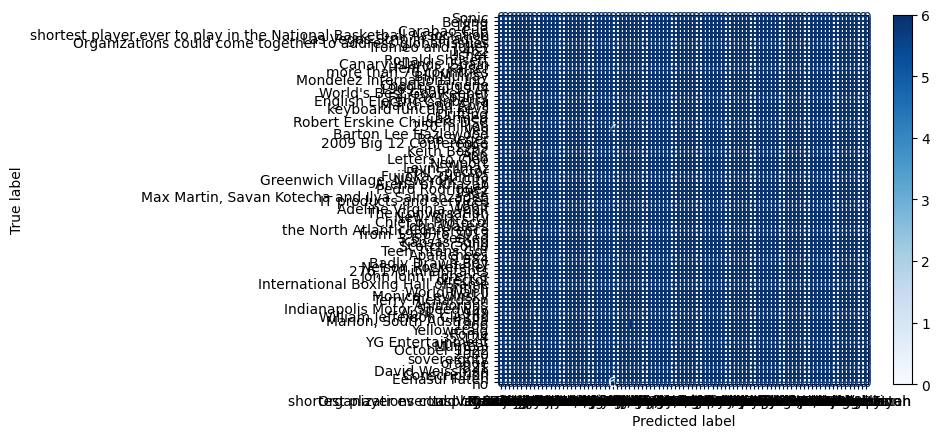

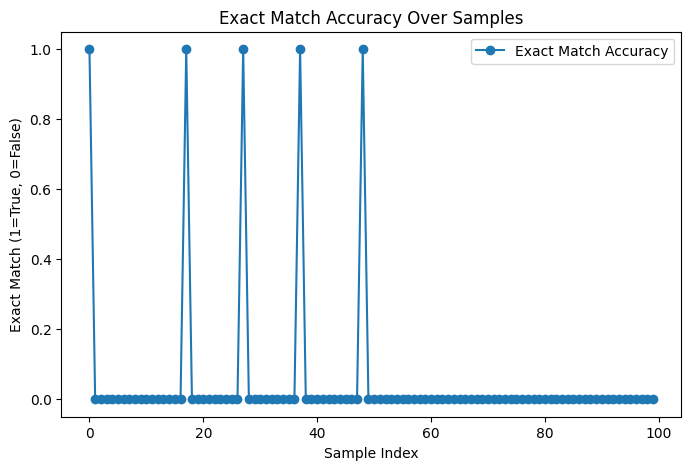

In [3]:
# Confusion Matrix
conf_matrix = confusion_matrix(actuals, predictions, labels=list(set(actuals)))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=list(set(actuals)))
disp.plot(cmap='Blues')
plt.show()

# Accuracy Graph
plt.figure(figsize=(8, 5))
plt.plot(range(len(exact_matches)), exact_matches, label="Exact Match Accuracy", marker='o')
plt.xlabel("Sample Index")
plt.ylabel("Exact Match (1=True, 0=False)")
plt.title("Exact Match Accuracy Over Samples")
plt.legend()
plt.show()

# Speech-to-Answer Function
def speech_to_answer(audio_path):
    question_text = transcribe_audio(audio_path)
    print(f"Transcribed Question: {question_text}")
    return answer_question(question_text)

# Example Usage
# result = speech_to_answer("path_to_audio.wav")
# print("Answer:", result)